In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://query.data.world/s/pw4ppapwneccijf5ceew5oiw225itm')

In [3]:
intel = pd.read_csv('https://query.data.world/s/jzzk3gvxtox4kwtb66kokw5q62nw4j')

In [4]:
data = data.dropna()
data

,Breed,weight_high_lbs,weight_low_lbs,Classification,obey
0,Saint Bernard,190,110,Fair Working/Obedience Intelligence,0.30
2,Great Dane,160,120,Average Working/Obedience Intelligence,0.50
3,Newfoundland,150,100,Above Average Working Dogs,0.70
4,Irish Wolfhound,150,90,Average Working/Obedience Intelligence,0.50
5,Bullmastiff,130,100,Fair Working/Obedience Intelligence,0.30
...,...,...,...,...,...
99,Italian Greyhound,10,6,Fair Working/Obedience Intelligence,0.30
100,Yorkshire Terrier,7,3,Above Average Working Dogs,0.70
101,Pomeranian,7,3,Excellent Working Dogs,0.85
102,Maltese,6,4,Fair Working/Obedience Intelligence,0.30


In [5]:
data = data.merge(intel, on='Breed')
data.drop([x for x in data if x.endswith('_y')], axis=1, inplace=True)

In [18]:
data.sort_values('obey_x', ascending=False, inplace=True)
data.head(20)

,Breed,Classification_x,obey_x,reps_lower,reps_upper,avg_weight
17,Labrador Retriever,Brightest Dogs,0.95,1,4,67.5
54,Australian Cattle Dog,Brightest Dogs,0.95,1,4,40.0
9,Rottweiler,Brightest Dogs,0.95,1,4,100.0
89,Papillon,Brightest Dogs,0.95,1,4,7.5
11,Doberman Pinscher,Brightest Dogs,0.95,1,4,80.0
22,Golden Retriever,Brightest Dogs,0.95,1,4,65.0
55,Border Collie,Brightest Dogs,0.95,1,4,40.0
18,German Shorthaired Pointer,Excellent Working Dogs,0.85,5,15,65.0
10,Bernese Mountain Dog,Excellent Working Dogs,0.85,5,15,97.5
78,Schipperke,Excellent Working Dogs,0.85,5,15,15.0


In [12]:
data['avg_weight'] = (data['weight_high_lbs'] + data['weight_low_lbs']) / 2
data.drop(['weight_high_lbs', 'weight_low_lbs'], inplace=True, axis=1)

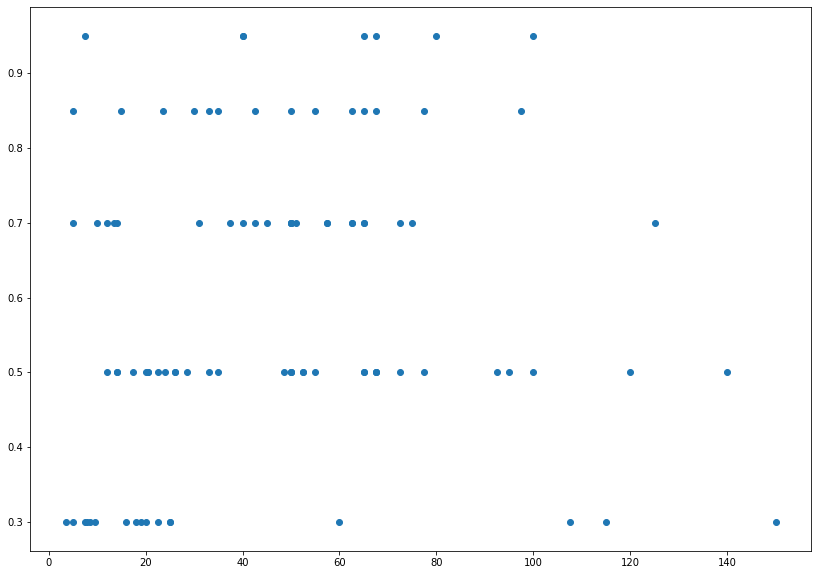

In [17]:
fig, ax = plt.subplots(figsize=(14,10))
plt.scatter(data['avg_weight'], data['obey_x'], marker='o')